# Начало лабораторной работы №1

*Набор данных для анализа и прогнозирования сердечного приступа*

Выгрузка данных из CSV файла в датафрейм

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

# Построение диаграмм

## Распределение индекса массы тела

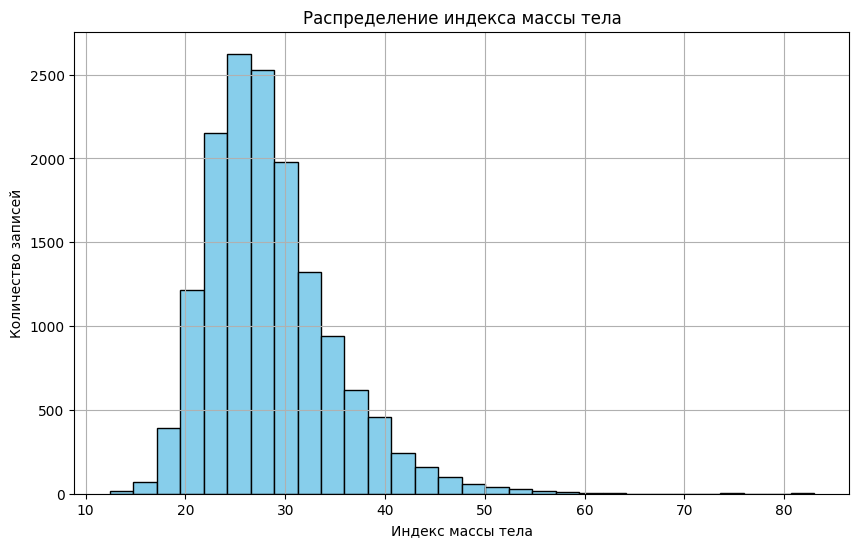

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df.head(15000)['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение индекса массы тела')
plt.xlabel('Индекс массы тела')
plt.ylabel('Количество записей')
plt.grid(True)
plt.show()

Данная диаграмма отображает распределение индекса массы тела среди всех наблюдаемых. Это позволяет сделать вывод о том, что большинство участников имеют ИМТ **в диапазоне от 18 до 40**, что может коррелировать с риском сердечного приступа.

## Соотношение людей с болезнями сердца по полу

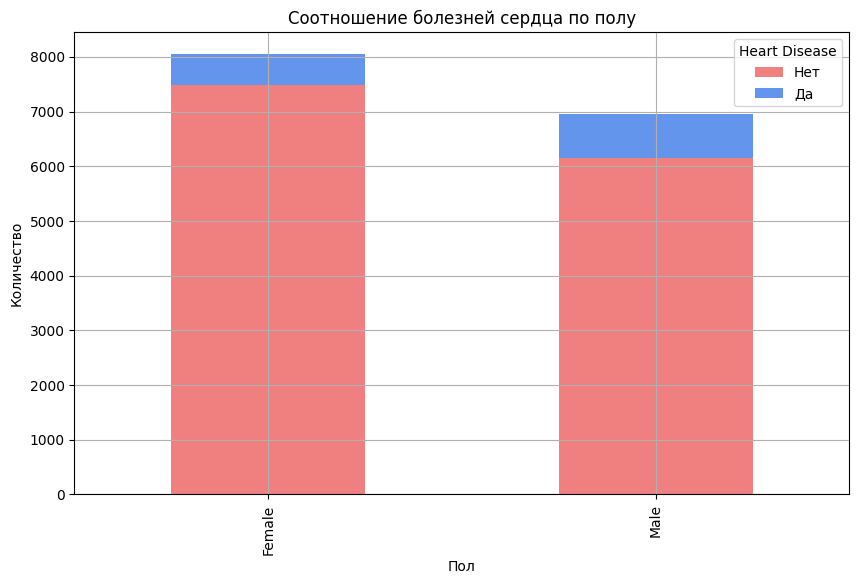

In [14]:
heart_disease_sex = df.head(15000).groupby(['Sex', 'HeartDisease']).size().unstack()

heart_disease_sex.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'cornflowerblue'])
plt.title('Соотношение болезней сердца по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Heart Disease', labels=['Нет', 'Да'])
plt.grid(True)
plt.show()

Данная столбчатая диаграмма показывает соотношение людей с сердечными заболеваниями среди мужчин и женщин. Она позволяет сделать вывод о том, что **среди мужчин** более высокая доля тех, кто страдает сердечными заболеваниями.

## Влияние физического и психического здоровья на наличие болезней сердца

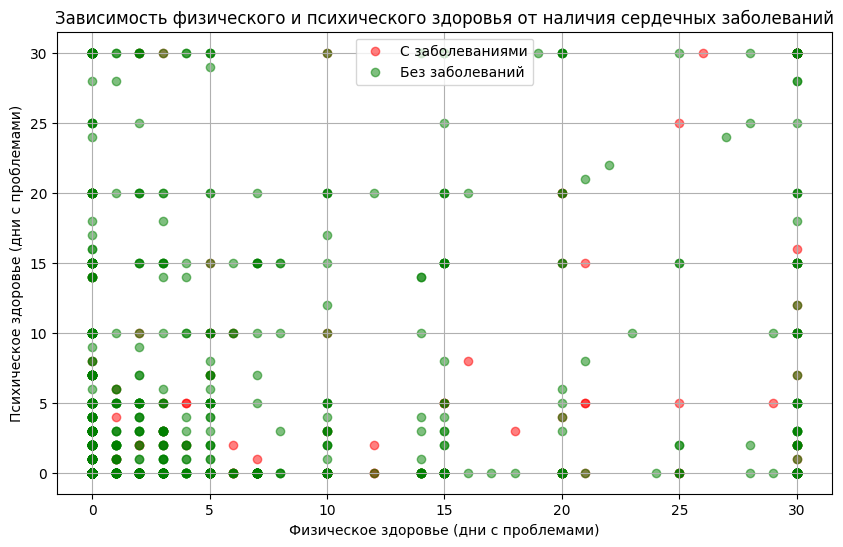

In [21]:
df_slice = df.iloc[0:2000]

plt.figure(figsize=(10, 6))
plt.scatter(df_slice[df_slice['HeartDisease'] == 'Yes']['PhysicalHealth'],
            df_slice[df_slice['HeartDisease'] == 'Yes']['MentalHealth'],
            color='red', label='С заболеваниями', alpha=0.5)
plt.scatter(df_slice[df_slice['HeartDisease'] == 'No']['PhysicalHealth'],
            df_slice[df_slice['HeartDisease'] == 'No']['MentalHealth'],
            color='green', label='Без заболеваний', alpha=0.5)

plt.title('Зависимость физического и психического здоровья от наличия сердечных заболеваний')
plt.xlabel('Физическое здоровье (дни с проблемами)')
plt.ylabel('Психическое здоровье (дни с проблемами)')
plt.legend()
plt.grid(True)
plt.show()

Эта диаграмма рассеяния показывает взаимосвязь между физическим и психическим здоровьем людей, страдающих и не страдающих сердечными заболеваниями. Это позволяет сделать вывод о том, что **ухудшение физического и психического здоровья** связано с **повышенным риском** сердечного приступа.